In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [249]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [250]:
file = '2013~2023 한국 기온,습도,풍속.csv'
file2 = '한국기후 평균 최고 최저.csv'

In [251]:
df = pd.read_csv(file, encoding = 'cp949')
df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)
df1.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,105,강릉,1970-01-01,3.2,10.3,-0.5
1,105,강릉,1970-01-02,1.8,5.1,-0.2
2,105,강릉,1970-01-03,-0.3,4.8,-2.2
3,105,강릉,1970-01-04,-5.9,-1.7,-12.6
4,105,강릉,1970-01-05,-7.9,-0.8,-14.7


In [252]:
df1.columns = ['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']
df1 = df1.iloc[:, 2:]
df1.head()

,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,1970-01-01,3.2,10.3,-0.5
1,1970-01-02,1.8,5.1,-0.2
2,1970-01-03,-0.3,4.8,-2.2
3,1970-01-04,-5.9,-1.7,-12.6
4,1970-01-05,-7.9,-0.8,-14.7


In [253]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_temp = df1.groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [254]:
filter1 = df_temp['최고기온(℃)'].isna() == True
df_temp['최고기온(℃)'][filter1] = 20.7875

In [255]:
filter2 = df_temp['최저기온(℃)'].isna() == True
df_temp['최저기온(℃)'][filter2] = 7.15625

In [256]:
df_korea = df_korea.reset_index()

In [257]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

In [258]:
#dataset = df_korea.iloc[:, :3]
dataset = df_temp.iloc[:, :]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(19585, 3)

In [259]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 14688 Test Size :  4897


In [260]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

In [261]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(14688, 3)

In [262]:
x_train = []
y_train = []
time_step = 60
n_col = 3

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

30 30
x_train :  [array([[0.28644888, 0.31922063, 0.28660807],
       [0.29945554, 0.29607384, 0.3198272 ],
       [0.25937689, 0.25388222, 0.26530612],
       [0.10027223, 0.10108409, 0.08580366],
       [0.02510587, 0.04731907, 0.        ],
       [0.24319419, 0.25754468, 0.20527335],
       [0.22837266, 0.23513038, 0.23596008],
       [0.23835451, 0.25388222, 0.23447043],
       [0.17211131, 0.16319953, 0.18948309],
       [0.20220811, 0.21432757, 0.19603754],
       [0.23275862, 0.25212423, 0.2215105 ],
       [0.33318209, 0.35159684, 0.2919708 ],
       [0.15366001, 0.17096396, 0.17488455],
       [0.09195402, 0.10225608, 0.10859526],
       [0.06488203, 0.05288602, 0.09742291],
       [0.05792498, 0.08980369, 0.04856249],
       [0.0738052 , 0.09449165, 0.07239684],
       [0.12885662, 0.18678582, 0.1084463 ],
       [0.17029643, 0.20773513, 0.16803218],
       [0.1822444 , 0.22121301, 0.17116043],
       [0.22081065, 0.27175505, 0.194101  ],
       [0.28055051, 0.32390858, 0.248

30 3699
30 3700
30 3701
30 3702
30 3703
30 3704
30 3705
30 3706
30 3707
30 3708
30 3709
30 3710
30 3711
30 3712
30 3713
30 3714
30 3715
30 3716
30 3717
30 3718
30 3719
30 3720
30 3721
30 3722
30 3723
30 3724
30 3725
30 3726
30 3727
30 3728
30 3729
30 3730
30 3731
30 3732
30 3733
30 3734
30 3735
30 3736
30 3737
30 3738
30 3739
30 3740
30 3741
30 3742
30 3743
30 3744
30 3745
30 3746
30 3747
30 3748
30 3749
30 3750
30 3751
30 3752
30 3753
30 3754
30 3755
30 3756
30 3757
30 3758
30 3759
30 3760
30 3761
30 3762
30 3763
30 3764
30 3765
30 3766
30 3767
30 3768
30 3769
30 3770
30 3771
30 3772
30 3773
30 3774
30 3775
30 3776
30 3777
30 3778
30 3779
30 3780
30 3781
30 3782
30 3783
30 3784
30 3785
30 3786
30 3787
30 3788
30 3789
30 3790
30 3791
30 3792
30 3793
30 3794
30 3795
30 3796
30 3797
30 3798
30 3799
30 3800
30 3801
30 3802
30 3803
30 3804
30 3805
30 3806
30 3807
30 3808
30 3809
30 3810
30 3811
30 3812
30 3813
30 3814
30 3815
30 3816
30 3817
30 3818
30 3819
30 3820
30 3821
30 3822
30 3823


30 7559
30 7560
30 7561
30 7562
30 7563
30 7564
30 7565
30 7566
30 7567
30 7568
30 7569
30 7570
30 7571
30 7572
30 7573
30 7574
30 7575
30 7576
30 7577
30 7578
30 7579
30 7580
30 7581
30 7582
30 7583
30 7584
30 7585
30 7586
30 7587
30 7588
30 7589
30 7590
30 7591
30 7592
30 7593
30 7594
30 7595
30 7596
30 7597
30 7598
30 7599
30 7600
30 7601
30 7602
30 7603
30 7604
30 7605
30 7606
30 7607
30 7608
30 7609
30 7610
30 7611
30 7612
30 7613
30 7614
30 7615
30 7616
30 7617
30 7618
30 7619
30 7620
30 7621
30 7622
30 7623
30 7624
30 7625
30 7626
30 7627
30 7628
30 7629
30 7630
30 7631
30 7632
30 7633
30 7634
30 7635
30 7636
30 7637
30 7638
30 7639
30 7640
30 7641
30 7642
30 7643
30 7644
30 7645
30 7646
30 7647
30 7648
30 7649
30 7650
30 7651
30 7652
30 7653
30 7654
30 7655
30 7656
30 7657
30 7658
30 7659
30 7660
30 7661
30 7662
30 7663
30 7664
30 7665
30 7666
30 7667
30 7668
30 7669
30 7670
30 7671
30 7672
30 7673
30 7674
30 7675
30 7676
30 7677
30 7678
30 7679
30 7680
30 7681
30 7682
30 7683


30 11322
30 11323
30 11324
30 11325
30 11326
30 11327
30 11328
30 11329
30 11330
30 11331
30 11332
30 11333
30 11334
30 11335
30 11336
30 11337
30 11338
30 11339
30 11340
30 11341
30 11342
30 11343
30 11344
30 11345
30 11346
30 11347
30 11348
30 11349
30 11350
30 11351
30 11352
30 11353
30 11354
30 11355
30 11356
30 11357
30 11358
30 11359
30 11360
30 11361
30 11362
30 11363
30 11364
30 11365
30 11366
30 11367
30 11368
30 11369
30 11370
30 11371
30 11372
30 11373
30 11374
30 11375
30 11376
30 11377
30 11378
30 11379
30 11380
30 11381
30 11382
30 11383
30 11384
30 11385
30 11386
30 11387
30 11388
30 11389
30 11390
30 11391
30 11392
30 11393
30 11394
30 11395
30 11396
30 11397
30 11398
30 11399
30 11400
30 11401
30 11402
30 11403
30 11404
30 11405
30 11406
30 11407
30 11408
30 11409
30 11410
30 11411
30 11412
30 11413
30 11414
30 11415
30 11416
30 11417
30 11418
30 11419
30 11420
30 11421
30 11422
30 11423
30 11424
30 11425
30 11426
30 11427
30 11428
30 11429
30 11430
30 11431
30 11432
3

30 15198
30 15199
30 15200
30 15201
30 15202
30 15203
30 15204
30 15205
30 15206
30 15207
30 15208
30 15209
30 15210
30 15211
30 15212
30 15213
30 15214
30 15215
30 15216
30 15217
30 15218
30 15219
30 15220
30 15221
30 15222
30 15223
30 15224
30 15225
30 15226
30 15227
30 15228
30 15229
30 15230
30 15231
30 15232
30 15233
30 15234
30 15235
30 15236
30 15237
30 15238
30 15239
30 15240
30 15241
30 15242
30 15243
30 15244
30 15245
30 15246
30 15247
30 15248
30 15249
30 15250
30 15251
30 15252
30 15253
30 15254
30 15255
30 15256
30 15257
30 15258
30 15259
30 15260
30 15261
30 15262
30 15263
30 15264
30 15265
30 15266
30 15267
30 15268
30 15269
30 15270
30 15271
30 15272
30 15273
30 15274
30 15275
30 15276
30 15277
30 15278
30 15279
30 15280
30 15281
30 15282
30 15283
30 15284
30 15285
30 15286
30 15287
30 15288
30 15289
30 15290
30 15291
30 15292
30 15293
30 15294
30 15295
30 15296
30 15297
30 15298
30 15299
30 15300
30 15301
30 15302
30 15303
30 15304
30 15305
30 15306
30 15307
30 15308
3

30 19120
30 19121
30 19122
30 19123
30 19124
30 19125
30 19126
30 19127
30 19128
30 19129
30 19130
30 19131
30 19132
30 19133
30 19134
30 19135
30 19136
30 19137
30 19138
30 19139
30 19140
30 19141
30 19142
30 19143
30 19144
30 19145
30 19146
30 19147
30 19148
30 19149
30 19150
30 19151
30 19152
30 19153
30 19154
30 19155
30 19156
30 19157
30 19158
30 19159
30 19160
30 19161
30 19162
30 19163
30 19164
30 19165
30 19166
30 19167
30 19168
30 19169
30 19170
30 19171
30 19172
30 19173
30 19174
30 19175
30 19176
30 19177
30 19178
30 19179
30 19180
30 19181
30 19182
30 19183
30 19184
30 19185
30 19186
30 19187
30 19188
30 19189
30 19190
30 19191
30 19192
30 19193
30 19194
30 19195
30 19196
30 19197
30 19198
30 19199
30 19200
30 19201
30 19202
30 19203
30 19204
30 19205
30 19206
30 19207
30 19208
30 19209
30 19210
30 19211
30 19212
30 19213
30 19214
30 19215
30 19216
30 19217
30 19218
30 19219
30 19220
30 19221
30 19222
30 19223
30 19224
30 19225
30 19226
30 19227
30 19228
30 19229
30 19230
3

In [308]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [309]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [310]:
x_train.shape, y_train.shape

((19555, 30, 3), (19555, 3))

In [335]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True, kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.LSTM(64, return_sequences = False, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(n_col)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 30, 50)            10800     
                                                                 
 dropout_26 (Dropout)        (None, 30, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 64)                22272     
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dense_44 (Dense)            (None, 3)               

In [336]:
m_lstm.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [337]:
h = m_lstm.fit(x_train, y_train, epochs = 30, shuffle=False, batch_size = 32)

Epoch 1/30
612/612 [==============================] - 8s 11ms/step - loss: 0.0646 - mae: 0.1051
Epoch 2/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0170 - mae: 0.0726
Epoch 3/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0129 - mae: 0.0673
Epoch 4/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0108 - mae: 0.0655
Epoch 5/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0100 - mae: 0.0653
Epoch 6/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0095 - mae: 0.0648
Epoch 7/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0091 - mae: 0.0645
Epoch 8/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0090 - mae: 0.0648
Epoch 9/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0089 - mae: 0.0647
Epoch 10/30
612/612 [==============================] - 7s 11ms/step - loss: 0.0087 - mae: 0.0643
Epoch 11/30
612/612 [==================

# 건들지 마시오

Text(0, 0.5, 'Losses')

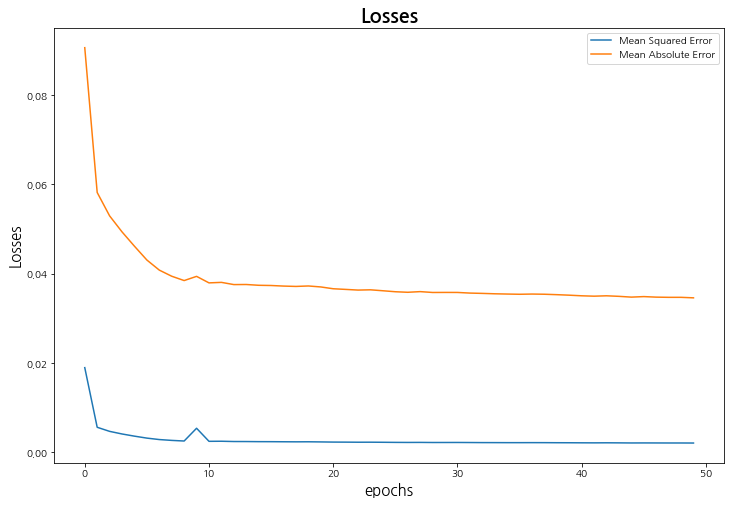

In [153]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [155]:
m_lstm_RMSprop = tf.keras.models.load_model('m4_lstm_RMSprop.h5')

In [154]:
# 8/25 loss율 엄청 좋음
m_lstm.save('m4_lstm_RMSprop.h5')

# 건들지 마시오

Text(0, 0.5, 'Losses')

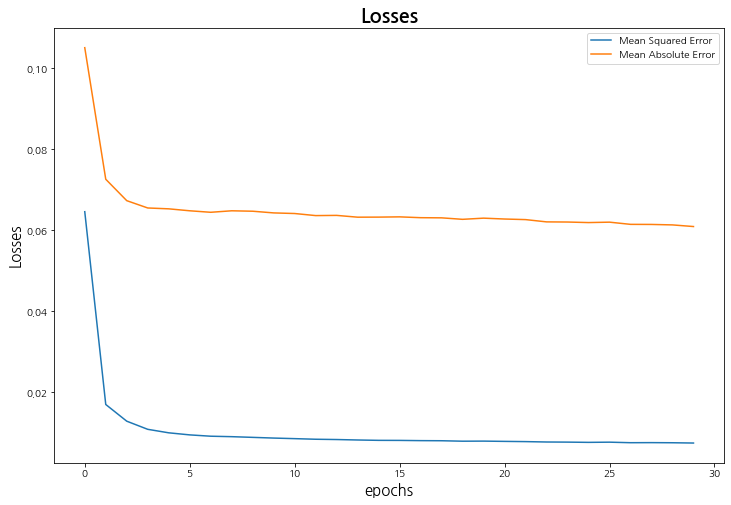

In [338]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [339]:
#8/30
m_lstm.save('m5_lstm_RMSprop.h5')

In [340]:
m_lstm_RMSprop = tf.keras.models.load_model('m5_lstm_RMSprop.h5')

In [341]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    #print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

x_test

array([[[0.25030248, 0.22868444, 0.2822881 ],
        [0.27661827, 0.29885731, 0.2620289 ],
        [0.34754991, 0.38968649, 0.31297482],
        ...,
        [0.33076225, 0.333431  , 0.32518993],
        [0.32410768, 0.31526516, 0.34083122],
        [0.42301875, 0.4890126 , 0.31163414]],

       [[0.27661827, 0.29885731, 0.2620289 ],
        [0.34754991, 0.38968649, 0.31297482],
        [0.38520871, 0.43583358, 0.32548786],
        ...,
        [0.32410768, 0.31526516, 0.34083122],
        [0.42301875, 0.4890126 , 0.31163414],
        [0.53962492, 0.58804571, 0.50737375]],

       [[0.34754991, 0.38968649, 0.31297482],
        [0.38520871, 0.43583358, 0.32548786],
        [0.42407743, 0.4661588 , 0.39133025],
        ...,
        [0.42301875, 0.4890126 , 0.31163414],
        [0.53962492, 0.58804571, 0.50737375],
        [0.38430127, 0.38397304, 0.39267094]],

       ...,

       [[0.87068966, 0.7884559 , 0.92909281],
        [0.87114338, 0.7998828 , 0.90942947],
        [0.84951603, 0

In [342]:
m_lstm_RMSprop.evaluate(x_test, y_test)

154/154 [==============================] - 1s 4ms/step - loss: 0.0101 - mae: 0.0712


[0.01009435299783945, 0.07117710262537003]

In [343]:
pred = m_lstm_RMSprop.predict(x_test)
pred

154/154 [==============================] - 1s 3ms/step


array([[0.42673475, 0.4434719 , 0.41711238],
       [0.4319536 , 0.44842613, 0.42234215],
       [0.43763226, 0.45378253, 0.42806667],
       ...,
       [0.87354445, 0.8574739 , 0.8749608 ],
       [0.864354  , 0.8491665 , 0.8653363 ],
       [0.85956275, 0.8448356 , 0.86031866]], dtype=float32)

In [344]:
pred = scaler.inverse_transform(pred)
print(pred.shape)
pred

(4897, 3)


array([[ 7.128563 , 12.1696205,  2.9379714],
       [ 7.3442326, 12.3809805,  3.157393 ],
       [ 7.578903 , 12.609498 ,  3.3975723],
       ...,
       [25.592974 , 29.831982 , 22.147573 ],
       [25.213179 , 29.477568 , 21.743767 ],
       [25.01518  , 29.292799 , 21.533245 ]], dtype=float32)

In [345]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[11.79375, 18.3375 ,  6.725  ],
       [ 5.375  ,  9.63125,  1.9125 ],
       [ 5.3625 ,  8.70625,  2.075  ],
       ...,
       [26.8875 , 31.00625, 23.51875],
       [27.4    , 31.6625 , 24.34375],
       [27.2375 , 31.2125 , 24.2125 ]])

In [346]:
pred = pd.DataFrame(pred)
y_test = pd.DataFrame(y_test)

In [347]:
pred.columns = ['예측평균기온', '예측최고기온', '예측최저기온']
y_test.columns = ['실제평균기온', '실제최고기온', '실제최저기온']

#pred.columns = ['예측평균기온', '예측최고기온']
#y_test.columns = ['실제평균기온', '실제최고기온']

In [348]:
df_pred = pd.concat((pred, y_test), axis = 1)
df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온', '예측최저기온', '실제최저기온']]
#df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온']]
df_pred

,예측평균기온,실제평균기온,예측최고기온,실제최고기온,예측최저기온,실제최저기온
0,7.128563,11.79375,12.169621,18.33750,2.937971,6.72500
1,7.344233,5.37500,12.380980,9.63125,3.157393,1.91250
2,7.578903,5.36250,12.609498,8.70625,3.397572,2.07500
3,7.792747,7.25625,12.816735,11.08125,3.617420,4.09375
4,8.142982,8.90625,13.156335,12.89375,3.977309,5.36250
...,...,...,...,...,...,...
4892,26.851784,26.24375,31.006664,29.97500,23.486010,22.85625
4893,26.163771,25.86250,30.364632,29.23125,22.754475,23.14375
4894,25.592974,26.88750,29.831982,31.00625,22.147573,23.51875
4895,25.213179,27.40000,29.477568,31.66250,21.743767,24.34375


Text(0.5, 1.0, '예측 평균 기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


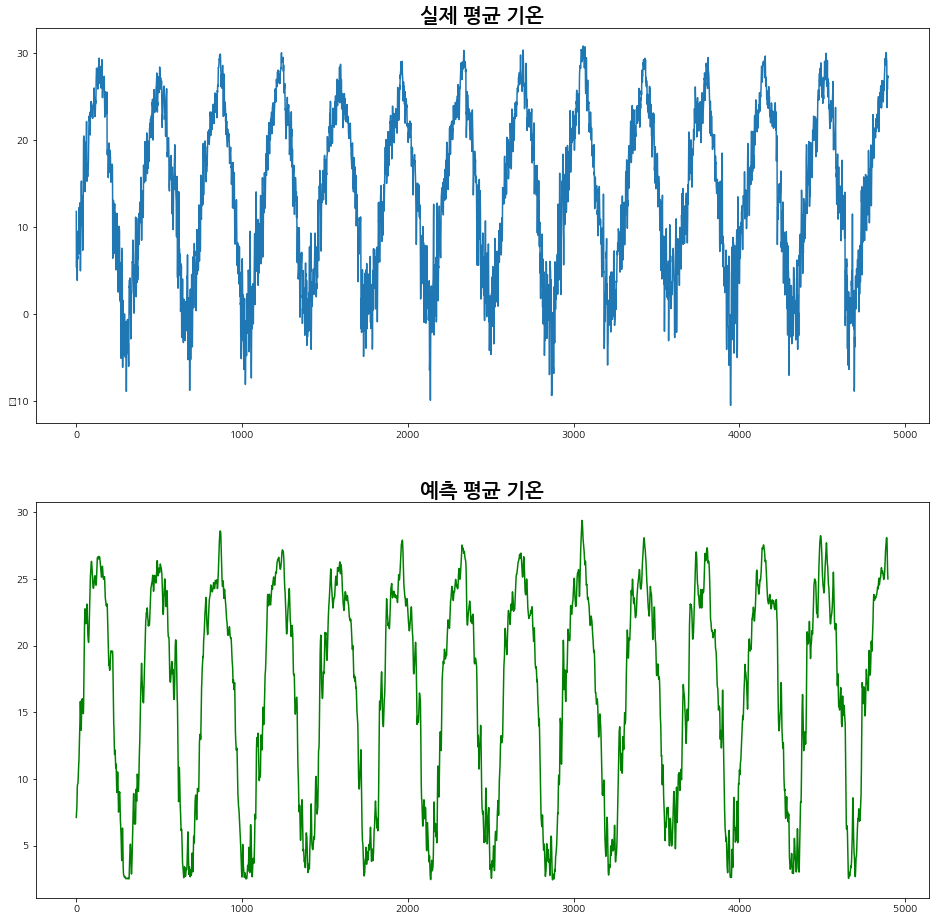

In [349]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제평균기온'])
axe[1].plot(df_pred['예측평균기온'], c = 'g')

axe[0].set_title('실제 평균 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 평균 기온', size = 20, weight = 'bold')
#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최고 기온')

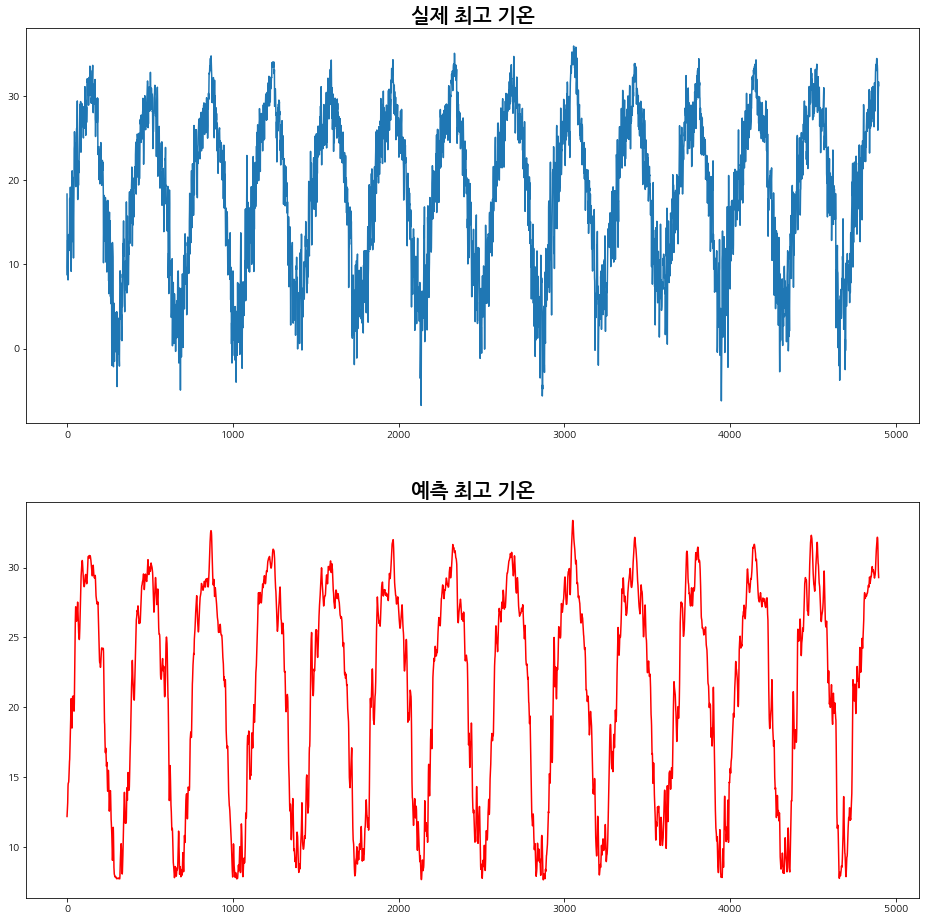

In [350]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최고기온'])
axe[1].plot(df_pred['예측최고기온'], c = 'r')

axe[0].set_title('실제 최고 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최고 기온', size = 20, weight = 'bold')

#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최저 기온')

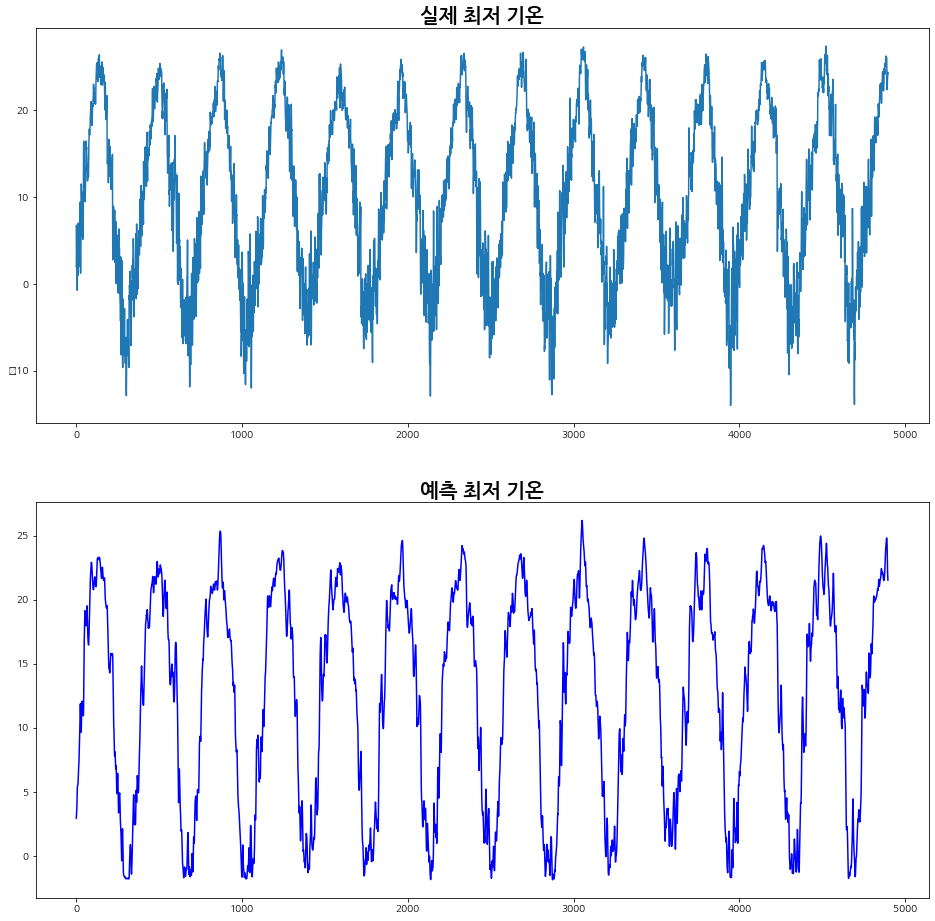

In [351]:

fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최저기온'])
axe[1].plot(df_pred['예측최저기온'], c = 'b')

axe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')


In [352]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2025-08-15
730


In [353]:
list(x_test[-1][0])

[0.8495160314579552, 0.7985643129211837, 0.8946819603753912]

In [354]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(list(x_test[-1][i]))
len(last_array)
np.array(last_array)

array([[0.84951603, 0.79856431, 0.89468196],
       [0.88551119, 0.86214474, 0.90987636],
       [0.84467635, 0.77527102, 0.89483093],
       [0.86584997, 0.84192792, 0.87695516],
       [0.88067151, 0.86170524, 0.87918963],
       [0.90229885, 0.89774392, 0.89393714],
       [0.87598306, 0.84060943, 0.89617161],
       [0.88808227, 0.81878113, 0.93862655],
       [0.89337568, 0.86199824, 0.92432593],
       [0.90804598, 0.87401113, 0.93505139],
       [0.92075015, 0.90301787, 0.93490243],
       [0.93965517, 0.92719016, 0.92238939],
       [0.95447671, 0.93788456, 0.94667064],
       [0.96521476, 0.94828597, 0.95292716],
       [0.95251059, 0.94696748, 0.94711753],
       [0.94797338, 0.93173161, 0.94369135],
       [0.96264368, 0.95077644, 0.94890511],
       [0.9661222 , 0.95150894, 0.96097125],
       [0.97595281, 0.96513331, 0.9594816 ],
       [0.9807925 , 0.96498682, 0.97244153],
       [0.98200242, 0.96501611, 0.9700581 ],
       [0.96581972, 0.94813947, 0.97050499],
       [0.

In [355]:
for i in range(time_step, d_day + time_step):
    print(time_step, i)
    last_ar = np.array(last_array)[i-time_step:i, 0:n_col]
    print(last_ar)
    array = np.reshape(last_ar, (1, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(list(m_lstm_RMSprop.predict(array)[0]))
    print(len(last_array))

30 30
[[0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.8433929

1/1 [==============================] - 0s 14ms/step
38
30 38
[[0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.85956275 0.84483558 0.86031866]
 [0.85257417 0.83851856 0.85299993]
 [0.84372526 0.83051986 0.84373271]
 [0.83458143 0.82225472 0.83415675]
 [0

1/1 [==============================] - 0s 13ms/step
46
30 46
[[0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.85956275 0.84483558 0.86031866]
 [0.85257417 0.83851856 0.85299993]
 [0.84372526 0.83051986 0.84373271]
 [0.83458143 0.82225472 0.83415675]
 [0.82535034 0.81391066 0.82448924]
 [0.81623429 0.80567068 0.81494224]
 [0.80742365 0.79770672 0.80571508]
 [0.79928029 0.79034591 0.79718685]
 [0.79202402 0.78378707 0.7895875 ]
 [0.78538293 0.77778417 0.78263247]
 [0.77972525 0.77267021 0.77670741]
 [0.77481812 0.76823467 0.7715683 ]
 [0

1/1 [==============================] - 0s 16ms/step
54
30 54
[[0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.85956275 0.84483558 0.86031866]
 [0.85257417 0.83851856 0.85299993]
 [0.84372526 0.83051986 0.84373271]
 [0.83458143 0.82225472 0.83415675]
 [0.82535034 0.81391066 0.82448924]
 [0.81623429 0.80567068 0.81494224]
 [0.80742365 0.79770672 0.80571508]
 [0.79928029 0.79034591 0.79718685]
 [0.79202402 0.78378707 0.7895875 ]
 [0.78538293 0.77778417 0.78263247]
 [0.77972525 0.77267021 0.77670741]
 [0.77481812 0.76823467 0.7715683 ]
 [0.77063823 0.76445645 0.76719069]
 [0.76716703 0.76131886 0.76355541]
 [0.76436931 0.75879008 0.76062536]
 [0.76230305 0.75692248 0.75846136]
 [0.76096731 0.75571507 0.75706255]
 [0.76018029 0.75500369 0.75623822]
 [0.76003778 0.75487483 0.75608897]
 [0.76060271 0.75538546 0.75668061]
 [0

1/1 [==============================] - 0s 16ms/step
62
30 62
[[0.84372526 0.83051986 0.84373271]
 [0.83458143 0.82225472 0.83415675]
 [0.82535034 0.81391066 0.82448924]
 [0.81623429 0.80567068 0.81494224]
 [0.80742365 0.79770672 0.80571508]
 [0.79928029 0.79034591 0.79718685]
 [0.79202402 0.78378707 0.7895875 ]
 [0.78538293 0.77778417 0.78263247]
 [0.77972525 0.77267021 0.77670741]
 [0.77481812 0.76823467 0.7715683 ]
 [0.77063823 0.76445645 0.76719069]
 [0.76716703 0.76131886 0.76355541]
 [0.76436931 0.75879008 0.76062536]
 [0.76230305 0.75692248 0.75846136]
 [0.76096731 0.75571507 0.75706255]
 [0.76018029 0.75500369 0.75623822]
 [0.76003778 0.75487483 0.75608897]
 [0.76060271 0.75538546 0.75668061]
 [0.76167494 0.75635469 0.75780356]
 [0.76308584 0.75762999 0.75928116]
 [0.76527625 0.75960994 0.76157522]
 [0.76815832 0.76221484 0.76459348]
 [0.77164692 0.76536816 0.76824713]
 [0.77518892 0.76856977 0.77195656]
 [0.77931005 0.77229488 0.77627254]
 [0.78439826 0.77689409 0.78160131]
 [0

1/1 [==============================] - 0s 15ms/step
70
30 70
[[0.77972525 0.77267021 0.77670741]
 [0.77481812 0.76823467 0.7715683 ]
 [0.77063823 0.76445645 0.76719069]
 [0.76716703 0.76131886 0.76355541]
 [0.76436931 0.75879008 0.76062536]
 [0.76230305 0.75692248 0.75846136]
 [0.76096731 0.75571507 0.75706255]
 [0.76018029 0.75500369 0.75623822]
 [0.76003778 0.75487483 0.75608897]
 [0.76060271 0.75538546 0.75668061]
 [0.76167494 0.75635469 0.75780356]
 [0.76308584 0.75762999 0.75928116]
 [0.76527625 0.75960994 0.76157522]
 [0.76815832 0.76221484 0.76459348]
 [0.77164692 0.76536816 0.76824713]
 [0.77518892 0.76856977 0.77195656]
 [0.77931005 0.77229488 0.77627254]
 [0.78439826 0.77689409 0.78160131]
 [0.79013711 0.78208143 0.78761148]
 [0.79646206 0.78779858 0.79423547]
 [0.80315292 0.79384643 0.80124259]
 [0.80984354 0.79989409 0.80824959]
 [0.81691641 0.80628717 0.81565678]
 [0.82418805 0.81286007 0.82327211]
 [0.83162409 0.81958151 0.83105981]
 [0.83911097 0.8263489  0.83890057]
 [0

1/1 [==============================] - 0s 14ms/step
78
30 78
[[0.76003778 0.75487483 0.75608897]
 [0.76060271 0.75538546 0.75668061]
 [0.76167494 0.75635469 0.75780356]
 [0.76308584 0.75762999 0.75928116]
 [0.76527625 0.75960994 0.76157522]
 [0.76815832 0.76221484 0.76459348]
 [0.77164692 0.76536816 0.76824713]
 [0.77518892 0.76856977 0.77195656]
 [0.77931005 0.77229488 0.77627254]
 [0.78439826 0.77689409 0.78160131]
 [0.79013711 0.78208143 0.78761148]
 [0.79646206 0.78779858 0.79423547]
 [0.80315292 0.79384643 0.80124259]
 [0.80984354 0.79989409 0.80824959]
 [0.81691641 0.80628717 0.81565678]
 [0.82418805 0.81286007 0.82327211]
 [0.83162409 0.81958151 0.83105981]
 [0.83911097 0.8263489  0.83890057]
 [0.84660757 0.83312511 0.84675157]
 [0.85397315 0.83978283 0.85446537]
 [0.86123168 0.84634376 0.86206698]
 [0.86832243 0.85275322 0.86949289]
 [0.87513286 0.85890919 0.8766253 ]
 [0.88155872 0.8647176  0.88335478]
 [0.88764143 0.87021583 0.88972485]
 [0.89327598 0.87530899 0.89562559]
 [0

1/1 [==============================] - 0s 19ms/step
86
30 86
[[0.77931005 0.77229488 0.77627254]
 [0.78439826 0.77689409 0.78160131]
 [0.79013711 0.78208143 0.78761148]
 [0.79646206 0.78779858 0.79423547]
 [0.80315292 0.79384643 0.80124259]
 [0.80984354 0.79989409 0.80824959]
 [0.81691641 0.80628717 0.81565678]
 [0.82418805 0.81286007 0.82327211]
 [0.83162409 0.81958151 0.83105981]
 [0.83911097 0.8263489  0.83890057]
 [0.84660757 0.83312511 0.84675157]
 [0.85397315 0.83978283 0.85446537]
 [0.86123168 0.84634376 0.86206698]
 [0.86832243 0.85275322 0.86949289]
 [0.87513286 0.85890919 0.8766253 ]
 [0.88155872 0.8647176  0.88335478]
 [0.88764143 0.87021583 0.88972485]
 [0.89327598 0.87530899 0.89562559]
 [0.89847946 0.88001269 0.90107501]
 [0.90312117 0.88420838 0.905936  ]
 [0.90714687 0.8878473  0.91015196]
 [0.91052181 0.89089787 0.91368616]
 [0.91315162 0.89327514 0.91644037]
 [0.91499758 0.89494371 0.91837347]
 [0.91604251 0.89588821 0.91946757]
 [0.91625947 0.89608431 0.91969478]
 [0

1/1 [==============================] - 0s 18ms/step
94
30 94
[[0.83162409 0.81958151 0.83105981]
 [0.83911097 0.8263489  0.83890057]
 [0.84660757 0.83312511 0.84675157]
 [0.85397315 0.83978283 0.85446537]
 [0.86123168 0.84634376 0.86206698]
 [0.86832243 0.85275322 0.86949289]
 [0.87513286 0.85890919 0.8766253 ]
 [0.88155872 0.8647176  0.88335478]
 [0.88764143 0.87021583 0.88972485]
 [0.89327598 0.87530899 0.89562559]
 [0.89847946 0.88001269 0.90107501]
 [0.90312117 0.88420838 0.905936  ]
 [0.90714687 0.8878473  0.91015196]
 [0.91052181 0.89089787 0.91368616]
 [0.91315162 0.89327514 0.91644037]
 [0.91499758 0.89494371 0.91837347]
 [0.91604251 0.89588821 0.91946757]
 [0.91625947 0.89608431 0.91969478]
 [0.91565424 0.89553726 0.91906106]
 [0.91422236 0.894243   0.91756141]
 [0.91198933 0.89222455 0.91522276]
 [0.90899938 0.88952202 0.91209161]
 [0.90531451 0.88619113 0.90823257]
 [0.90096742 0.88226169 0.90367997]
 [0.89603537 0.8778035  0.89851487]
 [0.89060146 0.87289184 0.89282429]
 [0

1/1 [==============================] - 0s 15ms/step
102
30 102
[[0.88764143 0.87021583 0.88972485]
 [0.89327598 0.87530899 0.89562559]
 [0.89847946 0.88001269 0.90107501]
 [0.90312117 0.88420838 0.905936  ]
 [0.90714687 0.8878473  0.91015196]
 [0.91052181 0.89089787 0.91368616]
 [0.91315162 0.89327514 0.91644037]
 [0.91499758 0.89494371 0.91837347]
 [0.91604251 0.89588821 0.91946757]
 [0.91625947 0.89608431 0.91969478]
 [0.91565424 0.89553726 0.91906106]
 [0.91422236 0.894243   0.91756141]
 [0.91198933 0.89222455 0.91522276]
 [0.90899938 0.88952202 0.91209161]
 [0.90531451 0.88619113 0.90823257]
 [0.90096742 0.88226169 0.90367997]
 [0.89603537 0.8778035  0.89851487]
 [0.89060146 0.87289184 0.89282429]
 [0.88475513 0.8676073  0.88670158]
 [0.87869543 0.86212975 0.8803556 ]
 [0.87251842 0.85654622 0.87388682]
 [0.86616039 0.85079914 0.86722839]
 [0.8597464  0.84500146 0.86051118]
 [0.85332739 0.83919924 0.85378885]
 [0.84699118 0.83347195 0.84715307]
 [0.84080601 0.82788116 0.84067559]
 

 [0.79349816 0.78511947 0.79113138]]
(1, 30, 3)
1/1 [==============================] - 0s 15ms/step
110
30 110
[[0.91604251 0.89588821 0.91946757]
 [0.91625947 0.89608431 0.91969478]
 [0.91565424 0.89553726 0.91906106]
 [0.91422236 0.894243   0.91756141]
 [0.91198933 0.89222455 0.91522276]
 [0.90899938 0.88952202 0.91209161]
 [0.90531451 0.88619113 0.90823257]
 [0.90096742 0.88226169 0.90367997]
 [0.89603537 0.8778035  0.89851487]
 [0.89060146 0.87289184 0.89282429]
 [0.88475513 0.8676073  0.88670158]
 [0.87869543 0.86212975 0.8803556 ]
 [0.87251842 0.85654622 0.87388682]
 [0.86616039 0.85079914 0.86722839]
 [0.8597464  0.84500146 0.86051118]
 [0.85332739 0.83919924 0.85378885]
 [0.84699118 0.83347195 0.84715307]
 [0.84080601 0.82788116 0.84067559]
 [0.83479941 0.82245171 0.83438504]
 [0.82903963 0.81724542 0.82835305]
 [0.82358837 0.81231809 0.822644  ]
 [0.81838727 0.80761671 0.81719708]
 [0.81355137 0.80324566 0.8121326 ]
 [0.80915552 0.79927218 0.80752897]
 [0.80517918 0.79567796 0

1/1 [==============================] - 0s 16ms/step
118
30 118
[[0.89603537 0.8778035  0.89851487]
 [0.89060146 0.87289184 0.89282429]
 [0.88475513 0.8676073  0.88670158]
 [0.87869543 0.86212975 0.8803556 ]
 [0.87251842 0.85654622 0.87388682]
 [0.86616039 0.85079914 0.86722839]
 [0.8597464  0.84500146 0.86051118]
 [0.85332739 0.83919924 0.85378885]
 [0.84699118 0.83347195 0.84715307]
 [0.84080601 0.82788116 0.84067559]
 [0.83479941 0.82245171 0.83438504]
 [0.82903963 0.81724542 0.82835305]
 [0.82358837 0.81231809 0.822644  ]
 [0.81838727 0.80761671 0.81719708]
 [0.81355137 0.80324566 0.8121326 ]
 [0.80915552 0.79927218 0.80752897]
 [0.80517918 0.79567796 0.80336463]
 [0.8015902  0.79243398 0.79960608]
 [0.79843605 0.78958285 0.7963028 ]
 [0.79573333 0.78713989 0.79347229]
 [0.79349816 0.78511947 0.79113138]
 [0.79173762 0.78352815 0.78928757]
 [0.79044652 0.78236115 0.7879355 ]
 [0.78964376 0.78163558 0.78709483]
 [0.78930575 0.78132999 0.78674066]
 [0.78942686 0.78143948 0.78686774]
 

1/1 [==============================] - 0s 14ms/step
126
30 126
[[0.84699118 0.83347195 0.84715307]
 [0.84080601 0.82788116 0.84067559]
 [0.83479941 0.82245171 0.83438504]
 [0.82903963 0.81724542 0.82835305]
 [0.82358837 0.81231809 0.822644  ]
 [0.81838727 0.80761671 0.81719708]
 [0.81355137 0.80324566 0.8121326 ]
 [0.80915552 0.79927218 0.80752897]
 [0.80517918 0.79567796 0.80336463]
 [0.8015902  0.79243398 0.79960608]
 [0.79843605 0.78958285 0.7963028 ]
 [0.79573333 0.78713989 0.79347229]
 [0.79349816 0.78511947 0.79113138]
 [0.79173762 0.78352815 0.78928757]
 [0.79044652 0.78236115 0.7879355 ]
 [0.78964376 0.78163558 0.78709483]
 [0.78930575 0.78132999 0.78674066]
 [0.78942686 0.78143948 0.78686774]
 [0.79000211 0.78195935 0.78746998]
 [0.7910226  0.7828818  0.78853881]
 [0.79243481 0.78415835 0.79001772]
 [0.79426461 0.78581232 0.79193413]
 [0.79648989 0.7878238  0.79426467]
 [0.79909921 0.79018229 0.79699719]
 [0.80210161 0.79289615 0.80014169]
 [0.80552274 0.79598856 0.80372453]
 

1/1 [==============================] - 0s 16ms/step
134
30 134
[[0.80517918 0.79567796 0.80336463]
 [0.8015902  0.79243398 0.79960608]
 [0.79843605 0.78958285 0.7963028 ]
 [0.79573333 0.78713989 0.79347229]
 [0.79349816 0.78511947 0.79113138]
 [0.79173762 0.78352815 0.78928757]
 [0.79044652 0.78236115 0.7879355 ]
 [0.78964376 0.78163558 0.78709483]
 [0.78930575 0.78132999 0.78674066]
 [0.78942686 0.78143948 0.78686774]
 [0.79000211 0.78195935 0.78746998]
 [0.7910226  0.7828818  0.78853881]
 [0.79243481 0.78415835 0.79001772]
 [0.79426461 0.78581232 0.79193413]
 [0.79648989 0.7878238  0.79426467]
 [0.79909921 0.79018229 0.79699719]
 [0.80210161 0.79289615 0.80014169]
 [0.80552274 0.79598856 0.80372453]
 [0.80926037 0.79936701 0.80763888]
 [0.81329453 0.80301344 0.81186354]
 [0.8175602  0.80686915 0.81633103]
 [0.82202828 0.81090772 0.82101023]
 [0.82671481 0.81514406 0.82591856]
 [0.83155048 0.81951493 0.83098269]
 [0.83646464 0.82395697 0.83612907]
 [0.84143233 0.82844716 0.8413316 ]
 

1/1 [==============================] - 0s 19ms/step
142
30 142
[[0.78930575 0.78132999 0.78674066]
 [0.78942686 0.78143948 0.78686774]
 [0.79000211 0.78195935 0.78746998]
 [0.7910226  0.7828818  0.78853881]
 [0.79243481 0.78415835 0.79001772]
 [0.79426461 0.78581232 0.79193413]
 [0.79648989 0.7878238  0.79426467]
 [0.79909921 0.79018229 0.79699719]
 [0.80210161 0.79289615 0.80014169]
 [0.80552274 0.79598856 0.80372453]
 [0.80926037 0.79936701 0.80763888]
 [0.81329453 0.80301344 0.81186354]
 [0.8175602  0.80686915 0.81633103]
 [0.82202828 0.81090772 0.82101023]
 [0.82671481 0.81514406 0.82591856]
 [0.83155048 0.81951493 0.83098269]
 [0.83646464 0.82395697 0.83612907]
 [0.84143233 0.82844716 0.8413316 ]
 [0.8464061  0.83294296 0.84654057]
 [0.85130012 0.8373667  0.85166585]
 [0.85609108 0.84169728 0.85668325]
 [0.86070549 0.84586829 0.861516  ]
 [0.86516362 0.84989804 0.86618471]
 [0.8693915  0.85371965 0.8706125 ]
 [0.8733139  0.85726506 0.87472034]
 [0.87690169 0.86050802 0.87847745]
 

1/1 [==============================] - 0s 16ms/step
150
30 150
[[0.80210161 0.79289615 0.80014169]
 [0.80552274 0.79598856 0.80372453]
 [0.80926037 0.79936701 0.80763888]
 [0.81329453 0.80301344 0.81186354]
 [0.8175602  0.80686915 0.81633103]
 [0.82202828 0.81090772 0.82101023]
 [0.82671481 0.81514406 0.82591856]
 [0.83155048 0.81951493 0.83098269]
 [0.83646464 0.82395697 0.83612907]
 [0.84143233 0.82844716 0.8413316 ]
 [0.8464061  0.83294296 0.84654057]
 [0.85130012 0.8373667  0.85166585]
 [0.85609108 0.84169728 0.85668325]
 [0.86070549 0.84586829 0.861516  ]
 [0.86516362 0.84989804 0.86618471]
 [0.8693915  0.85371965 0.8706125 ]
 [0.8733139  0.85726506 0.87472034]
 [0.87690169 0.86050802 0.87847745]
 [0.88013458 0.86343044 0.88186324]
 [0.88301867 0.86603743 0.88488364]
 [0.88549477 0.86827558 0.88747644]
 [0.88752079 0.87010694 0.88959825]
 [0.88907367 0.87151062 0.89122462]
 [0.89013416 0.87246925 0.89233506]
 [0.89069539 0.87297654 0.89292288]
 [0.89075667 0.87303191 0.89298701]
 

1/1 [==============================] - 0s 15ms/step
158
30 158
[[0.83646464 0.82395697 0.83612907]
 [0.84143233 0.82844716 0.8413316 ]
 [0.8464061  0.83294296 0.84654057]
 [0.85130012 0.8373667  0.85166585]
 [0.85609108 0.84169728 0.85668325]
 [0.86070549 0.84586829 0.861516  ]
 [0.86516362 0.84989804 0.86618471]
 [0.8693915  0.85371965 0.8706125 ]
 [0.8733139  0.85726506 0.87472034]
 [0.87690169 0.86050802 0.87847745]
 [0.88013458 0.86343044 0.88186324]
 [0.88301867 0.86603743 0.88488364]
 [0.88549477 0.86827558 0.88747644]
 [0.88752079 0.87010694 0.88959825]
 [0.88907367 0.87151062 0.89122462]
 [0.89013416 0.87246925 0.89233506]
 [0.89069539 0.87297654 0.89292288]
 [0.89075667 0.87303191 0.89298701]
 [0.89031416 0.87263197 0.89252365]
 [0.8893801  0.87178767 0.8915453 ]
 [0.88795745 0.8705017  0.89005542]
 [0.88607109 0.86879665 0.88808   ]
 [0.88375676 0.86670476 0.88565636]
 [0.88104975 0.86425781 0.88282132]
 [0.87798887 0.86149108 0.8796159 ]
 [0.87461436 0.85844076 0.87608182]
 

1/1 [==============================] - 0s 14ms/step
166
30 166
[[0.8733139  0.85726506 0.87472034]
 [0.87690169 0.86050802 0.87847745]
 [0.88013458 0.86343044 0.88186324]
 [0.88301867 0.86603743 0.88488364]
 [0.88549477 0.86827558 0.88747644]
 [0.88752079 0.87010694 0.88959825]
 [0.88907367 0.87151062 0.89122462]
 [0.89013416 0.87246925 0.89233506]
 [0.89069539 0.87297654 0.89292288]
 [0.89075667 0.87303191 0.89298701]
 [0.89031416 0.87263197 0.89252365]
 [0.8893801  0.87178767 0.8915453 ]
 [0.88795745 0.8705017  0.89005542]
 [0.88607109 0.86879665 0.88808   ]
 [0.88375676 0.86670476 0.88565636]
 [0.88104975 0.86425781 0.88282132]
 [0.87798887 0.86149108 0.8796159 ]
 [0.87461436 0.85844076 0.87608182]
 [0.87096947 0.85514617 0.87226474]
 [0.8670916  0.85164088 0.86820364]
 [0.86308587 0.84802002 0.86400855]
 [0.85897863 0.84430742 0.85970724]
 [0.85480756 0.84053719 0.85533905]
 [0.85063648 0.8367669  0.85097075]
 [0.84648395 0.83301342 0.84662187]
 [0.84240913 0.82933015 0.84235442]
 

1/1 [==============================] - 0s 18ms/step
174
30 174
[[0.89069539 0.87297654 0.89292288]
 [0.89075667 0.87303191 0.89298701]
 [0.89031416 0.87263197 0.89252365]
 [0.8893801  0.87178767 0.8915453 ]
 [0.88795745 0.8705017  0.89005542]
 [0.88607109 0.86879665 0.88808   ]
 [0.88375676 0.86670476 0.88565636]
 [0.88104975 0.86425781 0.88282132]
 [0.87798887 0.86149108 0.8796159 ]
 [0.87461436 0.85844076 0.87608182]
 [0.87096947 0.85514617 0.87226474]
 [0.8670916  0.85164088 0.86820364]
 [0.86308587 0.84802002 0.86400855]
 [0.85897863 0.84430742 0.85970724]
 [0.85480756 0.84053719 0.85533905]
 [0.85063648 0.8367669  0.85097075]
 [0.84648395 0.83301342 0.84662187]
 [0.84240913 0.82933015 0.84235442]
 [0.8384071  0.82571274 0.83816338]
 [0.83453351 0.82221138 0.83410656]
 [0.83083379 0.81886709 0.83023202]
 [0.8273409  0.81570983 0.82657397]
 [0.82404041 0.81272662 0.82311749]
 [0.82101339 0.80999053 0.81994736]
 [0.81826764 0.80750865 0.8170718 ]
 [0.81580454 0.80528224 0.81449234]
 

1/1 [==============================] - 0s 16ms/step
182
30 182
[[0.87798887 0.86149108 0.8796159 ]
 [0.87461436 0.85844076 0.87608182]
 [0.87096947 0.85514617 0.87226474]
 [0.8670916  0.85164088 0.86820364]
 [0.86308587 0.84802002 0.86400855]
 [0.85897863 0.84430742 0.85970724]
 [0.85480756 0.84053719 0.85533905]
 [0.85063648 0.8367669  0.85097075]
 [0.84648395 0.83301342 0.84662187]
 [0.84240913 0.82933015 0.84235442]
 [0.8384071  0.82571274 0.83816338]
 [0.83453351 0.82221138 0.83410656]
 [0.83083379 0.81886709 0.83023202]
 [0.8273409  0.81570983 0.82657397]
 [0.82404041 0.81272662 0.82311749]
 [0.82101339 0.80999053 0.81994736]
 [0.81826764 0.80750865 0.8170718 ]
 [0.81580454 0.80528224 0.81449234]
 [0.81363881 0.80332458 0.81222415]
 [0.81177825 0.80164289 0.81027567]
 [0.8102327  0.80024582 0.80865705]
 [0.80900198 0.79913342 0.80736828]
 [0.80808204 0.79830194 0.80640483]
 [0.80748749 0.79776442 0.80578208]
 [0.80721551 0.79751861 0.80549729]
 [0.80727327 0.79757077 0.80555773]
 

1/1 [==============================] - 0s 15ms/step
190
30 190
[[0.84648395 0.83301342 0.84662187]
 [0.84240913 0.82933015 0.84235442]
 [0.8384071  0.82571274 0.83816338]
 [0.83453351 0.82221138 0.83410656]
 [0.83083379 0.81886709 0.83023202]
 [0.8273409  0.81570983 0.82657397]
 [0.82404041 0.81272662 0.82311749]
 [0.82101339 0.80999053 0.81994736]
 [0.81826764 0.80750865 0.8170718 ]
 [0.81580454 0.80528224 0.81449234]
 [0.81363881 0.80332458 0.81222415]
 [0.81177825 0.80164289 0.81027567]
 [0.8102327  0.80024582 0.80865705]
 [0.80900198 0.79913342 0.80736828]
 [0.80808204 0.79830194 0.80640483]
 [0.80748749 0.79776442 0.80578208]
 [0.80721551 0.79751861 0.80549729]
 [0.80727327 0.79757077 0.80555773]
 [0.80764598 0.79790765 0.80594802]
 [0.8083272  0.79852337 0.80666137]
 [0.80930233 0.79940486 0.80768275]
 [0.81057423 0.80055451 0.80901468]
 [0.81214577 0.80197501 0.81066048]
 [0.81398451 0.80363709 0.81258631]
 [0.81612438 0.80557132 0.8148272 ]
 [0.81850064 0.80771929 0.81731594]
 

1/1 [==============================] - 0s 17ms/step
198
30 198
[[0.81826764 0.80750865 0.8170718 ]
 [0.81580454 0.80528224 0.81449234]
 [0.81363881 0.80332458 0.81222415]
 [0.81177825 0.80164289 0.81027567]
 [0.8102327  0.80024582 0.80865705]
 [0.80900198 0.79913342 0.80736828]
 [0.80808204 0.79830194 0.80640483]
 [0.80748749 0.79776442 0.80578208]
 [0.80721551 0.79751861 0.80549729]
 [0.80727327 0.79757077 0.80555773]
 [0.80764598 0.79790765 0.80594802]
 [0.8083272  0.79852337 0.80666137]
 [0.80930233 0.79940486 0.80768275]
 [0.81057423 0.80055451 0.80901468]
 [0.81214577 0.80197501 0.81066048]
 [0.81398451 0.80363709 0.81258631]
 [0.81612438 0.80557132 0.8148272 ]
 [0.81850064 0.80771929 0.81731594]
 [0.82108891 0.81005877 0.82002652]
 [0.82386267 0.81256598 0.82293141]
 [0.82680571 0.81522614 0.82601345]
 [0.82990092 0.81802392 0.8292551 ]
 [0.83311701 0.82093096 0.83262324]
 [0.83639312 0.82389224 0.83605421]
 [0.83972824 0.8269068  0.83954692]
 [0.84308881 0.82994449 0.84306633]
 

1/1 [==============================] - 0s 17ms/step
206
30 206
[[0.80721551 0.79751861 0.80549729]
 [0.80727327 0.79757077 0.80555773]
 [0.80764598 0.79790765 0.80594802]
 [0.8083272  0.79852337 0.80666137]
 [0.80930233 0.79940486 0.80768275]
 [0.81057423 0.80055451 0.80901468]
 [0.81214577 0.80197501 0.81066048]
 [0.81398451 0.80363709 0.81258631]
 [0.81612438 0.80557132 0.8148272 ]
 [0.81850064 0.80771929 0.81731594]
 [0.82108891 0.81005877 0.82002652]
 [0.82386267 0.81256598 0.82293141]
 [0.82680571 0.81522614 0.82601345]
 [0.82990092 0.81802392 0.8292551 ]
 [0.83311701 0.82093096 0.83262324]
 [0.83639312 0.82389224 0.83605421]
 [0.83972824 0.8269068  0.83954692]
 [0.84308881 0.82994449 0.84306633]
 [0.84644073 0.83297437 0.84657693]
 [0.84973341 0.83595049 0.85002518]
 [0.85296774 0.83887404 0.85341227]
 [0.85611308 0.84171718 0.85670626]
 [0.85910827 0.84442449 0.85984313]
 [0.86192375 0.84696949 0.86279178]
 [0.8645367  0.84933126 0.86552811]
 [0.86691731 0.85148317 0.86802125]
 

1/1 [==============================] - 0s 17ms/step
214
30 214
[[0.81612438 0.80557132 0.8148272 ]
 [0.81850064 0.80771929 0.81731594]
 [0.82108891 0.81005877 0.82002652]
 [0.82386267 0.81256598 0.82293141]
 [0.82680571 0.81522614 0.82601345]
 [0.82990092 0.81802392 0.8292551 ]
 [0.83311701 0.82093096 0.83262324]
 [0.83639312 0.82389224 0.83605421]
 [0.83972824 0.8269068  0.83954692]
 [0.84308881 0.82994449 0.84306633]
 [0.84644073 0.83297437 0.84657693]
 [0.84973341 0.83595049 0.85002518]
 [0.85296774 0.83887404 0.85341227]
 [0.85611308 0.84171718 0.85670626]
 [0.85910827 0.84442449 0.85984313]
 [0.86192375 0.84696949 0.86279178]
 [0.8645367  0.84933126 0.86552811]
 [0.86691731 0.85148317 0.86802125]
 [0.86904007 0.8534019  0.87024438]
 [0.87089437 0.85507798 0.87218618]
 [0.87245375 0.85648763 0.87381935]
 [0.87372559 0.85763735 0.87515128]
 [0.87469691 0.85851526 0.87616849]
 [0.87534171 0.85909808 0.87684369]
 [0.87565851 0.85938448 0.87717557]
 [0.87564439 0.85937172 0.87716079]
 

1/1 [==============================] - 0s 15ms/step
222
30 222
[[0.83972824 0.8269068  0.83954692]
 [0.84308881 0.82994449 0.84306633]
 [0.84644073 0.83297437 0.84657693]
 [0.84973341 0.83595049 0.85002518]
 [0.85296774 0.83887404 0.85341227]
 [0.85611308 0.84171718 0.85670626]
 [0.85910827 0.84442449 0.85984313]
 [0.86192375 0.84696949 0.86279178]
 [0.8645367  0.84933126 0.86552811]
 [0.86691731 0.85148317 0.86802125]
 [0.86904007 0.8534019  0.87024438]
 [0.87089437 0.85507798 0.87218618]
 [0.87245375 0.85648763 0.87381935]
 [0.87372559 0.85763735 0.87515128]
 [0.87469691 0.85851526 0.87616849]
 [0.87534171 0.85909808 0.87684369]
 [0.87565851 0.85938448 0.87717557]
 [0.87564439 0.85937172 0.87716079]
 [0.87530172 0.85906196 0.87680185]
 [0.87463909 0.85846311 0.87610793]
 [0.87366647 0.85758388 0.87508929]
 [0.87239677 0.85643619 0.87375963]
 [0.87084436 0.85503292 0.87213373]
 [0.86903566 0.85339808 0.87023962]
 [0.86698794 0.85154712 0.86809504]
 [0.86471194 0.84948981 0.86571157]
 

1/1 [==============================] - 0s 15ms/step
230
30 230
[[0.8645367  0.84933126 0.86552811]
 [0.86691731 0.85148317 0.86802125]
 [0.86904007 0.8534019  0.87024438]
 [0.87089437 0.85507798 0.87218618]
 [0.87245375 0.85648763 0.87381935]
 [0.87372559 0.85763735 0.87515128]
 [0.87469691 0.85851526 0.87616849]
 [0.87534171 0.85909808 0.87684369]
 [0.87565851 0.85938448 0.87717557]
 [0.87564439 0.85937172 0.87716079]
 [0.87530172 0.85906196 0.87680185]
 [0.87463909 0.85846311 0.87610793]
 [0.87366647 0.85758388 0.87508929]
 [0.87239677 0.85643619 0.87375963]
 [0.87084436 0.85503292 0.87213373]
 [0.86903566 0.85339808 0.87023962]
 [0.86698794 0.85154712 0.86809504]
 [0.86471194 0.84948981 0.86571157]
 [0.86225611 0.84726995 0.86313963]
 [0.85964668 0.84491122 0.86040688]
 [0.85693908 0.84246385 0.85757136]
 [0.85413986 0.83993369 0.85463977]
 [0.85130721 0.8373732  0.85167325]
 [0.84846705 0.83480591 0.84869874]
 [0.84563583 0.83224684 0.84573376]
 [0.84282196 0.82970339 0.84278691]
 

1/1 [==============================] - 0s 15ms/step
238
30 238
[[0.87565851 0.85938448 0.87717557]
 [0.87564439 0.85937172 0.87716079]
 [0.87530172 0.85906196 0.87680185]
 [0.87463909 0.85846311 0.87610793]
 [0.87366647 0.85758388 0.87508929]
 [0.87239677 0.85643619 0.87375963]
 [0.87084436 0.85503292 0.87213373]
 [0.86903566 0.85339808 0.87023962]
 [0.86698794 0.85154712 0.86809504]
 [0.86471194 0.84948981 0.86571157]
 [0.86225611 0.84726995 0.86313963]
 [0.85964668 0.84491122 0.86040688]
 [0.85693908 0.84246385 0.85757136]
 [0.85413986 0.83993369 0.85463977]
 [0.85130721 0.8373732  0.85167325]
 [0.84846705 0.83480591 0.84869874]
 [0.84563583 0.83224684 0.84573376]
 [0.84282196 0.82970339 0.84278691]
 [0.84005088 0.82719851 0.83988488]
 [0.83736634 0.824772   0.83707345]
 [0.83480418 0.82245606 0.83439016]
 [0.83237243 0.82025802 0.83184338]
 [0.83008605 0.81819123 0.82944894]
 [0.82796735 0.81627613 0.8272301 ]
 [0.82601523 0.81451166 0.82518578]
 [0.82427537 0.81293905 0.82336366]
 

1/1 [==============================] - 0s 15ms/step
246
30 246
[[0.86698794 0.85154712 0.86809504]
 [0.86471194 0.84948981 0.86571157]
 [0.86225611 0.84726995 0.86313963]
 [0.85964668 0.84491122 0.86040688]
 [0.85693908 0.84246385 0.85757136]
 [0.85413986 0.83993369 0.85463977]
 [0.85130721 0.8373732  0.85167325]
 [0.84846705 0.83480591 0.84869874]
 [0.84563583 0.83224684 0.84573376]
 [0.84282196 0.82970339 0.84278691]
 [0.84005088 0.82719851 0.83988488]
 [0.83736634 0.824772   0.83707345]
 [0.83480418 0.82245606 0.83439016]
 [0.83237243 0.82025802 0.83184338]
 [0.83008605 0.81819123 0.82944894]
 [0.82796735 0.81627613 0.8272301 ]
 [0.82601523 0.81451166 0.82518578]
 [0.82427537 0.81293905 0.82336366]
 [0.82274097 0.81155211 0.82175672]
 [0.82142174 0.81035954 0.82037497]
 [0.820324   0.80936742 0.81922543]
 [0.81945217 0.80857921 0.81831229]
 [0.81880909 0.80799806 0.81763887]
 [0.81839776 0.80762619 0.81720805]
 [0.81821537 0.80746138 0.8170172 ]
 [0.81825954 0.80750132 0.81706333]
 

1/1 [==============================] - 0s 13ms/step
254
30 254
[[0.84563583 0.83224684 0.84573376]
 [0.84282196 0.82970339 0.84278691]
 [0.84005088 0.82719851 0.83988488]
 [0.83736634 0.824772   0.83707345]
 [0.83480418 0.82245606 0.83439016]
 [0.83237243 0.82025802 0.83184338]
 [0.83008605 0.81819123 0.82944894]
 [0.82796735 0.81627613 0.8272301 ]
 [0.82601523 0.81451166 0.82518578]
 [0.82427537 0.81293905 0.82336366]
 [0.82274097 0.81155211 0.82175672]
 [0.82142174 0.81035954 0.82037497]
 [0.820324   0.80936742 0.81922543]
 [0.81945217 0.80857921 0.81831229]
 [0.81880909 0.80799806 0.81763887]
 [0.81839776 0.80762619 0.81720805]
 [0.81821537 0.80746138 0.8170172 ]
 [0.81825954 0.80750132 0.81706333]
 [0.81853914 0.80775404 0.81735611]
 [0.81904083 0.80820745 0.81788158]
 [0.81976455 0.80886167 0.81863964]
 [0.82069451 0.80970228 0.81961346]
 [0.8218472  0.81074417 0.82082057]
 [0.82321507 0.81198055 0.82225323]
 [0.82476479 0.81338137 0.82387614]
 [0.82647866 0.81493056 0.82567108]
 

1/1 [==============================] - 0s 16ms/step
262
30 262
[[0.82601523 0.81451166 0.82518578]
 [0.82427537 0.81293905 0.82336366]
 [0.82274097 0.81155211 0.82175672]
 [0.82142174 0.81035954 0.82037497]
 [0.820324   0.80936742 0.81922543]
 [0.81945217 0.80857921 0.81831229]
 [0.81880909 0.80799806 0.81763887]
 [0.81839776 0.80762619 0.81720805]
 [0.81821537 0.80746138 0.8170172 ]
 [0.81825954 0.80750132 0.81706333]
 [0.81853914 0.80775404 0.81735611]
 [0.81904083 0.80820745 0.81788158]
 [0.81976455 0.80886167 0.81863964]
 [0.82069451 0.80970228 0.81961346]
 [0.8218472  0.81074417 0.82082057]
 [0.82321507 0.81198055 0.82225323]
 [0.82476479 0.81338137 0.82387614]
 [0.82647866 0.81493056 0.82567108]
 [0.8283385  0.81661165 0.82761884]
 [0.83032572 0.81840795 0.82970011]
 [0.83242059 0.82030147 0.83189392]
 [0.83460319 0.82227439 0.83417976]
 [0.83686155 0.82431567 0.83654475]
 [0.83917421 0.82640612 0.83896685]
 [0.84151906 0.82852548 0.84142256]
 [0.84387815 0.83065796 0.84389317]
 

1/1 [==============================] - 0s 16ms/step
270
30 270
[[0.81821537 0.80746138 0.8170172 ]
 [0.81825954 0.80750132 0.81706333]
 [0.81853914 0.80775404 0.81735611]
 [0.81904083 0.80820745 0.81788158]
 [0.81976455 0.80886167 0.81863964]
 [0.82069451 0.80970228 0.81961346]
 [0.8218472  0.81074417 0.82082057]
 [0.82321507 0.81198055 0.82225323]
 [0.82476479 0.81338137 0.82387614]
 [0.82647866 0.81493056 0.82567108]
 [0.8283385  0.81661165 0.82761884]
 [0.83032572 0.81840795 0.82970011]
 [0.83242059 0.82030147 0.83189392]
 [0.83460319 0.82227439 0.83417976]
 [0.83686155 0.82431567 0.83654475]
 [0.83917421 0.82640612 0.83896685]
 [0.84151906 0.82852548 0.84142256]
 [0.84387815 0.83065796 0.84389317]
 [0.84622192 0.83277655 0.84634769]
 [0.84853452 0.83486688 0.84876955]
 [0.850793   0.83690834 0.8511349 ]
 [0.85297281 0.83887869 0.85341763]
 [0.85505641 0.84076202 0.85559964]
 [0.85700983 0.84252775 0.85764539]
 [0.85881132 0.84415609 0.85953212]
 [0.8604573  0.845644   0.861256  ]
 

1/1 [==============================] - 0s 15ms/step
278
30 278
[[0.82476479 0.81338137 0.82387614]
 [0.82647866 0.81493056 0.82567108]
 [0.8283385  0.81661165 0.82761884]
 [0.83032572 0.81840795 0.82970011]
 [0.83242059 0.82030147 0.83189392]
 [0.83460319 0.82227439 0.83417976]
 [0.83686155 0.82431567 0.83654475]
 [0.83917421 0.82640612 0.83896685]
 [0.84151906 0.82852548 0.84142256]
 [0.84387815 0.83065796 0.84389317]
 [0.84622192 0.83277655 0.84634769]
 [0.84853452 0.83486688 0.84876955]
 [0.850793   0.83690834 0.8511349 ]
 [0.85297281 0.83887869 0.85341763]
 [0.85505641 0.84076202 0.85559964]
 [0.85700983 0.84252775 0.85764539]
 [0.85881132 0.84415609 0.85953212]
 [0.8604573  0.845644   0.861256  ]
 [0.86192292 0.84696871 0.8627907 ]
 [0.86320049 0.84812355 0.86412871]
 [0.86427116 0.84909129 0.86524999]
 [0.86512184 0.84986025 0.86614096]
 [0.8657558  0.85043335 0.86680484]
 [0.86616522 0.85080343 0.86723363]
 [0.86634791 0.85096848 0.86742485]
 [0.86630422 0.85092902 0.86737919]
 

1/1 [==============================] - 0s 16ms/step
286
30 286
[[0.84151906 0.82852548 0.84142256]
 [0.84387815 0.83065796 0.84389317]
 [0.84622192 0.83277655 0.84634769]
 [0.84853452 0.83486688 0.84876955]
 [0.850793   0.83690834 0.8511349 ]
 [0.85297281 0.83887869 0.85341763]
 [0.85505641 0.84076202 0.85559964]
 [0.85700983 0.84252775 0.85764539]
 [0.85881132 0.84415609 0.85953212]
 [0.8604573  0.845644   0.861256  ]
 [0.86192292 0.84696871 0.8627907 ]
 [0.86320049 0.84812355 0.86412871]
 [0.86427116 0.84909129 0.86524999]
 [0.86512184 0.84986025 0.86614096]
 [0.8657558  0.85043335 0.86680484]
 [0.86616522 0.85080343 0.86723363]
 [0.86634791 0.85096848 0.86742485]
 [0.86630422 0.85092902 0.86737919]
 [0.86603665 0.85068721 0.86709893]
 [0.86554998 0.85024732 0.86658919]
 [0.86484575 0.84961069 0.86585176]
 [0.86393791 0.84879011 0.86490083]
 [0.86283964 0.84779733 0.8637507 ]
 [0.86156535 0.84664553 0.86241627]
 [0.86013168 0.84534967 0.86091483]
 [0.85855323 0.84392285 0.85926175]
 

1/1 [==============================] - 0s 20ms/step
294
30 294
[[0.85881132 0.84415609 0.85953212]
 [0.8604573  0.845644   0.861256  ]
 [0.86192292 0.84696871 0.8627907 ]
 [0.86320049 0.84812355 0.86412871]
 [0.86427116 0.84909129 0.86524999]
 [0.86512184 0.84986025 0.86614096]
 [0.8657558  0.85043335 0.86680484]
 [0.86616522 0.85080343 0.86723363]
 [0.86634791 0.85096848 0.86742485]
 [0.86630422 0.85092902 0.86737919]
 [0.86603665 0.85068721 0.86709893]
 [0.86554998 0.85024732 0.86658919]
 [0.86484575 0.84961069 0.86585176]
 [0.86393791 0.84879011 0.86490083]
 [0.86283964 0.84779733 0.8637507 ]
 [0.86156535 0.84664553 0.86241627]
 [0.86013168 0.84534967 0.86091483]
 [0.85855323 0.84392285 0.85926175]
 [0.8568365  0.84237111 0.85746396]
 [0.85500634 0.84071684 0.85554719]
 [0.85309082 0.83898538 0.85354114]
 [0.85110629 0.83719152 0.85146284]
 [0.84909475 0.83537328 0.84935617]
 [0.84707302 0.83354592 0.8472389 ]
 [0.84505373 0.83172065 0.84512413]
 [0.84303564 0.82989651 0.84301066]
 

1/1 [==============================] - 0s 18ms/step
302
30 302
[[0.86634791 0.85096848 0.86742485]
 [0.86630422 0.85092902 0.86737919]
 [0.86603665 0.85068721 0.86709893]
 [0.86554998 0.85024732 0.86658919]
 [0.86484575 0.84961069 0.86585176]
 [0.86393791 0.84879011 0.86490083]
 [0.86283964 0.84779733 0.8637507 ]
 [0.86156535 0.84664553 0.86241627]
 [0.86013168 0.84534967 0.86091483]
 [0.85855323 0.84392285 0.85926175]
 [0.8568365  0.84237111 0.85746396]
 [0.85500634 0.84071684 0.85554719]
 [0.85309082 0.83898538 0.85354114]
 [0.85110629 0.83719152 0.85146284]
 [0.84909475 0.83537328 0.84935617]
 [0.84707302 0.83354592 0.8472389 ]
 [0.84505373 0.83172065 0.84512413]
 [0.84303564 0.82989651 0.84301066]
 [0.84106076 0.82811135 0.8409425 ]
 [0.83914173 0.82637674 0.83893275]
 [0.83729982 0.8247118  0.83700371]
 [0.83554649 0.82312697 0.83516753]
 [0.8338927  0.82163221 0.83343565]
 [0.83235568 0.82024288 0.83182597]
 [0.83094811 0.81897044 0.83035171]
 [0.82967752 0.81782204 0.82902122]
 

1/1 [==============================] - 0s 16ms/step
310
30 310
[[0.86013168 0.84534967 0.86091483]
 [0.85855323 0.84392285 0.85926175]
 [0.8568365  0.84237111 0.85746396]
 [0.85500634 0.84071684 0.85554719]
 [0.85309082 0.83898538 0.85354114]
 [0.85110629 0.83719152 0.85146284]
 [0.84909475 0.83537328 0.84935617]
 [0.84707302 0.83354592 0.8472389 ]
 [0.84505373 0.83172065 0.84512413]
 [0.84303564 0.82989651 0.84301066]
 [0.84106076 0.82811135 0.8409425 ]
 [0.83914173 0.82637674 0.83893275]
 [0.83729982 0.8247118  0.83700371]
 [0.83554649 0.82312697 0.83516753]
 [0.8338927  0.82163221 0.83343565]
 [0.83235568 0.82024288 0.83182597]
 [0.83094811 0.81897044 0.83035171]
 [0.82967752 0.81782204 0.82902122]
 [0.82857019 0.81682116 0.82786155]
 [0.827609   0.8159523  0.82685483]
 [0.82680959 0.81522965 0.82601762]
 [0.82617587 0.81465685 0.82535398]
 [0.82571048 0.8142361  0.82486641]
 [0.82541448 0.81396866 0.82455659]
 [0.82528812 0.8138544  0.82442427]
 [0.82533544 0.81389719 0.82447374]
 

1/1 [==============================] - 0s 17ms/step
318
30 318
[[0.84505373 0.83172065 0.84512413]
 [0.84303564 0.82989651 0.84301066]
 [0.84106076 0.82811135 0.8409425 ]
 [0.83914173 0.82637674 0.83893275]
 [0.83729982 0.8247118  0.83700371]
 [0.83554649 0.82312697 0.83516753]
 [0.8338927  0.82163221 0.83343565]
 [0.83235568 0.82024288 0.83182597]
 [0.83094811 0.81897044 0.83035171]
 [0.82967752 0.81782204 0.82902122]
 [0.82857019 0.81682116 0.82786155]
 [0.827609   0.8159523  0.82685483]
 [0.82680959 0.81522965 0.82601762]
 [0.82617587 0.81465685 0.82535398]
 [0.82571048 0.8142361  0.82486641]
 [0.82541448 0.81396866 0.82455659]
 [0.82528812 0.8138544  0.82442427]
 [0.82533544 0.81389719 0.82447374]
 [0.82555044 0.8140915  0.82469893]
 [0.82593352 0.81443781 0.82510018]
 [0.82648379 0.81493521 0.82567644]
 [0.82720387 0.81558609 0.82643056]
 [0.82808077 0.81637865 0.82734895]
 [0.82909757 0.81729776 0.82841372]
 [0.83024836 0.81833798 0.82961893]
 [0.83150828 0.81947678 0.83093834]
 

1/1 [==============================] - 0s 15ms/step
326
30 326
[[0.83094811 0.81897044 0.83035171]
 [0.82967752 0.81782204 0.82902122]
 [0.82857019 0.81682116 0.82786155]
 [0.827609   0.8159523  0.82685483]
 [0.82680959 0.81522965 0.82601762]
 [0.82617587 0.81465685 0.82535398]
 [0.82571048 0.8142361  0.82486641]
 [0.82541448 0.81396866 0.82455659]
 [0.82528812 0.8138544  0.82442427]
 [0.82533544 0.81389719 0.82447374]
 [0.82555044 0.8140915  0.82469893]
 [0.82593352 0.81443781 0.82510018]
 [0.82648379 0.81493521 0.82567644]
 [0.82720387 0.81558609 0.82643056]
 [0.82808077 0.81637865 0.82734895]
 [0.82909757 0.81729776 0.82841372]
 [0.83024836 0.81833798 0.82961893]
 [0.83150828 0.81947678 0.83093834]
 [0.83286387 0.82070214 0.83235812]
 [0.83431214 0.82201117 0.8338747 ]
 [0.83584285 0.82339478 0.83547783]
 [0.83744085 0.82483929 0.83715141]
 [0.83908886 0.82632899 0.83887744]
 [0.84077513 0.82785314 0.84064329]
 [0.8424809  0.82939506 0.84242976]
 [0.84420192 0.8309505  0.84423208]
 

1/1 [==============================] - 0s 14ms/step
334
30 334
[[0.82528812 0.8138544  0.82442427]
 [0.82533544 0.81389719 0.82447374]
 [0.82555044 0.8140915  0.82469893]
 [0.82593352 0.81443781 0.82510018]
 [0.82648379 0.81493521 0.82567644]
 [0.82720387 0.81558609 0.82643056]
 [0.82808077 0.81637865 0.82734895]
 [0.82909757 0.81729776 0.82841372]
 [0.83024836 0.81833798 0.82961893]
 [0.83150828 0.81947678 0.83093834]
 [0.83286387 0.82070214 0.83235812]
 [0.83431214 0.82201117 0.8338747 ]
 [0.83584285 0.82339478 0.83547783]
 [0.83744085 0.82483929 0.83715141]
 [0.83908886 0.82632899 0.83887744]
 [0.84077513 0.82785314 0.84064329]
 [0.8424809  0.82939506 0.84242976]
 [0.84420192 0.8309505  0.84423208]
 [0.84591269 0.83249706 0.8460238 ]
 [0.84758186 0.83400583 0.84777188]
 [0.84920633 0.83547413 0.84947312]
 [0.85077107 0.83688849 0.85111189]
 [0.85226166 0.83823586 0.85267282]
 [0.85366362 0.83950311 0.85414112]
 [0.85495919 0.84067416 0.85549784]
 [0.85613483 0.84173685 0.85672903]
 

1/1 [==============================] - 0s 14ms/step
342
30 342
[[0.83024836 0.81833798 0.82961893]
 [0.83150828 0.81947678 0.83093834]
 [0.83286387 0.82070214 0.83235812]
 [0.83431214 0.82201117 0.8338747 ]
 [0.83584285 0.82339478 0.83547783]
 [0.83744085 0.82483929 0.83715141]
 [0.83908886 0.82632899 0.83887744]
 [0.84077513 0.82785314 0.84064329]
 [0.8424809  0.82939506 0.84242976]
 [0.84420192 0.8309505  0.84423208]
 [0.84591269 0.83249706 0.8460238 ]
 [0.84758186 0.83400583 0.84777188]
 [0.84920633 0.83547413 0.84947312]
 [0.85077107 0.83688849 0.85111189]
 [0.85226166 0.83823586 0.85267282]
 [0.85366362 0.83950311 0.85414112]
 [0.85495919 0.84067416 0.85549784]
 [0.85613483 0.84173685 0.85672903]
 [0.85717905 0.84268069 0.85782278]
 [0.8580839  0.84349859 0.85877025]
 [0.85884148 0.84418339 0.85956359]
 [0.85944492 0.84472883 0.86019564]
 [0.85989064 0.84513175 0.86066246]
 [0.8601746  0.84538835 0.86095977]
 [0.86029518 0.84549731 0.86108601]
 [0.8602522  0.84545851 0.86104095]
 

1/1 [==============================] - 0s 14ms/step
350
30 350
[[0.8424809  0.82939506 0.84242976]
 [0.84420192 0.8309505  0.84423208]
 [0.84591269 0.83249706 0.8460238 ]
 [0.84758186 0.83400583 0.84777188]
 [0.84920633 0.83547413 0.84947312]
 [0.85077107 0.83688849 0.85111189]
 [0.85226166 0.83823586 0.85267282]
 [0.85366362 0.83950311 0.85414112]
 [0.85495919 0.84067416 0.85549784]
 [0.85613483 0.84173685 0.85672903]
 [0.85717905 0.84268069 0.85782278]
 [0.8580839  0.84349859 0.85877025]
 [0.85884148 0.84418339 0.85956359]
 [0.85944492 0.84472883 0.86019564]
 [0.85989064 0.84513175 0.86066246]
 [0.8601746  0.84538835 0.86095977]
 [0.86029518 0.84549731 0.86108601]
 [0.8602522  0.84545851 0.86104095]
 [0.86004764 0.84527373 0.86082685]
 [0.85968602 0.8449468  0.86044812]
 [0.85917187 0.84448206 0.85990965]
 [0.85851228 0.8438859  0.85921896]
 [0.8577159  0.84316599 0.85838485]
 [0.85678709 0.8423264  0.85741222]
 [0.85573876 0.84137887 0.85631418]
 [0.85458559 0.8403365  0.85510659]
 

1/1 [==============================] - 0s 16ms/step
358
30 358
[[0.85495919 0.84067416 0.85549784]
 [0.85613483 0.84173685 0.85672903]
 [0.85717905 0.84268069 0.85782278]
 [0.8580839  0.84349859 0.85877025]
 [0.85884148 0.84418339 0.85956359]
 [0.85944492 0.84472883 0.86019564]
 [0.85989064 0.84513175 0.86066246]
 [0.8601746  0.84538835 0.86095977]
 [0.86029518 0.84549731 0.86108601]
 [0.8602522  0.84545851 0.86104095]
 [0.86004764 0.84527373 0.86082685]
 [0.85968602 0.8449468  0.86044812]
 [0.85917187 0.84448206 0.85990965]
 [0.85851228 0.8438859  0.85921896]
 [0.8577159  0.84316599 0.85838485]
 [0.85678709 0.8423264  0.85741222]
 [0.85573876 0.84137887 0.85631418]
 [0.85458559 0.8403365  0.85510659]
 [0.85334092 0.8392114  0.85380304]
 [0.85201681 0.83801448 0.8524164 ]
 [0.85062802 0.83675915 0.85096192]
 [0.8491897  0.83545911 0.8494556 ]
 [0.8477152  0.83412623 0.84791148]
 [0.84622031 0.83277512 0.8463459 ]
 [0.84473777 0.83143508 0.84479332]
 [0.84325224 0.83009225 0.84323764]
 

1/1 [==============================] - 0s 16ms/step
366
30 366
[[0.86029518 0.84549731 0.86108601]
 [0.8602522  0.84545851 0.86104095]
 [0.86004764 0.84527373 0.86082685]
 [0.85968602 0.8449468  0.86044812]
 [0.85917187 0.84448206 0.85990965]
 [0.85851228 0.8438859  0.85921896]
 [0.8577159  0.84316599 0.85838485]
 [0.85678709 0.8423264  0.85741222]
 [0.85573876 0.84137887 0.85631418]
 [0.85458559 0.8403365  0.85510659]
 [0.85334092 0.8392114  0.85380304]
 [0.85201681 0.83801448 0.8524164 ]
 [0.85062802 0.83675915 0.85096192]
 [0.8491897  0.83545911 0.8494556 ]
 [0.8477152  0.83412623 0.84791148]
 [0.84622031 0.83277512 0.8463459 ]
 [0.84473777 0.83143508 0.84479332]
 [0.84325224 0.83009225 0.84323764]
 [0.84179044 0.828771   0.84170675]
 [0.8403672  0.82748443 0.84021604]
 [0.83899641 0.82624543 0.83878052]
 [0.83769768 0.82507151 0.83742046]
 [0.8364715  0.82396311 0.83613622]
 [0.83532941 0.82293081 0.83494031]
 [0.83428049 0.82198262 0.83384168]
 [0.83333266 0.82112586 0.83284903]
 

1/1 [==============================] - 0s 15ms/step
374
30 374
[[0.85573876 0.84137887 0.85631418]
 [0.85458559 0.8403365  0.85510659]
 [0.85334092 0.8392114  0.85380304]
 [0.85201681 0.83801448 0.8524164 ]
 [0.85062802 0.83675915 0.85096192]
 [0.8491897  0.83545911 0.8494556 ]
 [0.8477152  0.83412623 0.84791148]
 [0.84622031 0.83277512 0.8463459 ]
 [0.84473777 0.83143508 0.84479332]
 [0.84325224 0.83009225 0.84323764]
 [0.84179044 0.828771   0.84170675]
 [0.8403672  0.82748443 0.84021604]
 [0.83899641 0.82624543 0.83878052]
 [0.83769768 0.82507151 0.83742046]
 [0.8364715  0.82396311 0.83613622]
 [0.83532941 0.82293081 0.83494031]
 [0.83428049 0.82198262 0.83384168]
 [0.83333266 0.82112586 0.83284903]
 [0.8324911  0.82036513 0.83196771]
 [0.83176267 0.81970674 0.83120489]
 [0.83116484 0.81916636 0.83057868]
 [0.83069289 0.81873977 0.83008444]
 [0.83034581 0.81842607 0.82972109]
 [0.83012599 0.81822735 0.82949078]
 [0.8300404  0.81814998 0.82940114]
 [0.83008248 0.81818807 0.82944524]
 

KeyboardInterrupt: 

In [ ]:
test_pred = np.array(last_array).reshape(len(last_array), n_col) 

In [200]:
test_pred = scaler.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred)
#test_pred.columns = ['미래예측평균기온', '미래예측최고기온', '미래예측최저기온']
test_pred

,0,1,2
0,24.600000,27.318750,22.975000
1,26.087500,30.031250,23.612500
2,24.400000,26.325000,22.981250
3,25.275000,29.168750,22.231250
4,25.887500,30.012500,22.325000
...,...,...,...
755,7.744580,12.663113,3.143909
756,8.758605,13.723785,4.124780
757,10.465766,15.509936,5.775834
758,13.179850,18.349790,8.400582


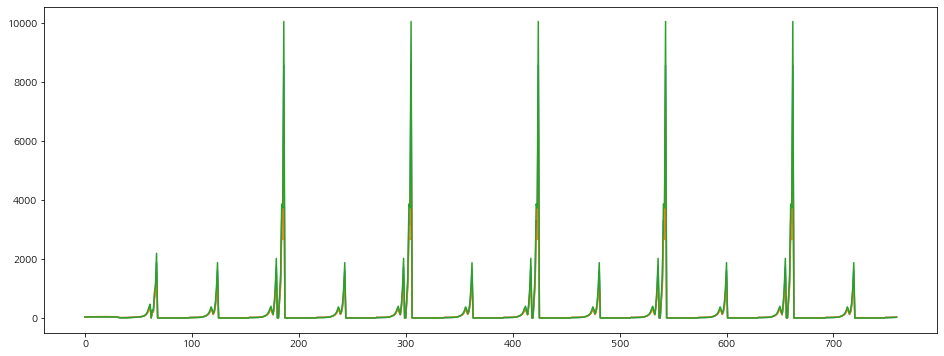

In [201]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(test_pred)